# Pipeline Notebook 

## Imports

In [23]:
import handwriting
import keras
import tensorflow as tf
import handwriting.preprocess as preprocess

## Bounding Box

### Bounding Box Modell

## Show Image Real Image

In [24]:
from bounding_box.model import load_weight_model,predict_image,get_image_as_array, show_image 
from bounding_box.config import NUM_CLASSES_ALL,BBOX_PATH,MAIN_BBOX_DETECTOR_MODEL,SUB_BBOX_DETECTOR_MODEL  
from bounding_box.model import load_weight_model, predict_image,plot_image, get_templated_data, edit_sub_boxes_cut_links, edit_sub_boxes_cut_top
from bounding_box.template import build_templating_data

bbox_model = load_weight_model(r"bounding_box\workspace\models\main_bbox_detector_model.h5",4)
image_path = "bounding_box/workspace/images/test_images/image_0001.jpg"
main_boxes, confidence, classes = predict_image(image_path, bbox_model)


KeyboardInterrupt



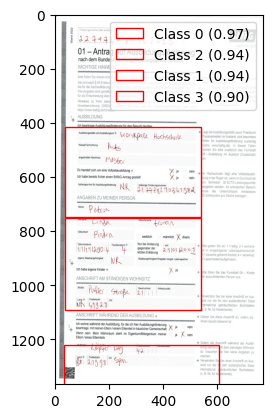

In [3]:
show_image((image_path), main_boxes,confidence,classes )  

## Templating

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

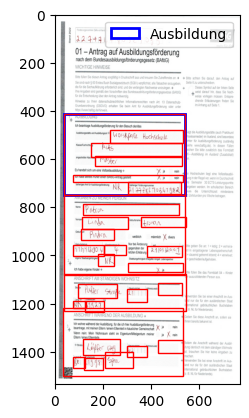

In [4]:
org_ms_boxes_person, org_ms_boxes_wohnsitz, org_ms_boxes_ausbildung, org_ms_boxes_wwa, person_class_ids, ausbildung_class_ids, wohnsitz_class_ids, wwa_class_ids, widthOrgImag, heightOrgImag = build_templating_data()

ausbildung, person, wohnsitz, wwa, best_predicted = get_templated_data(main_boxes, confidence, classes, org_ms_boxes_person,
                                                                       org_ms_boxes_wohnsitz, org_ms_boxes_ausbildung,
                                                                       org_ms_boxes_wwa, person_class_ids,
                                                                       ausbildung_class_ids, wohnsitz_class_ids,
                                                                       wwa_class_ids)


top_cut = False
if top_cut:
    ausbildung_cut_top, person_cut_top, wohnsitz_cut_top, wwa_cut_top = edit_sub_boxes_cut_top(ausbildung, person, wohnsitz, wwa)
    sub_boxes = ausbildung_cut_top[0] + person_cut_top[0] +  wohnsitz_cut_top[0] +  wwa_cut_top[0] 
    plot_image((image_path), ausbildung_cut_top, person_cut_top, wohnsitz_cut_top, wwa_cut_top, best_predicted)
else:
    ausbildung_cut_links, person_cut_links, wohnsitz_cut_links, wwa_cut_links = edit_sub_boxes_cut_links(ausbildung, person, wohnsitz, wwa)
    sub_boxes = ausbildung_cut_links[0]  + person_cut_links[0]  + wohnsitz_cut_links[0]  + wwa_cut_links[0] 
    plot_image(image_path, ausbildung_cut_links, person_cut_links, wohnsitz_cut_links, wwa_cut_links, best_predicted)


In [5]:
print(len(sub_boxes))

29


### ROI Crop

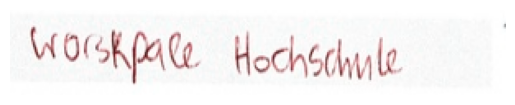

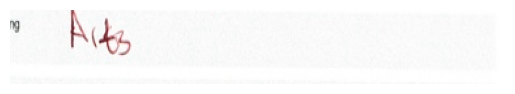

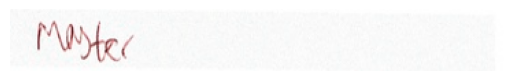

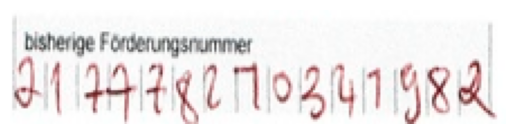

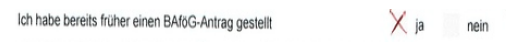

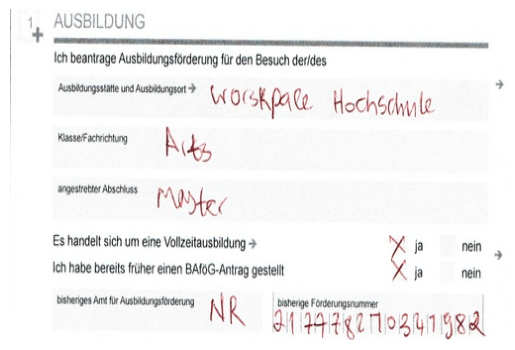

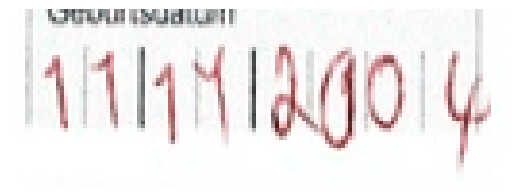

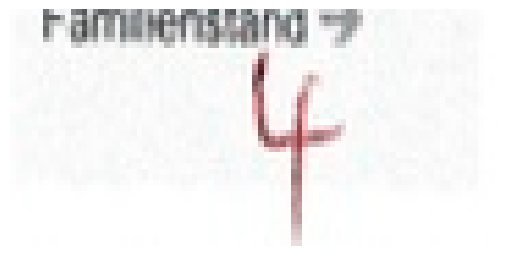

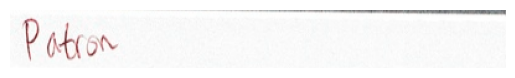

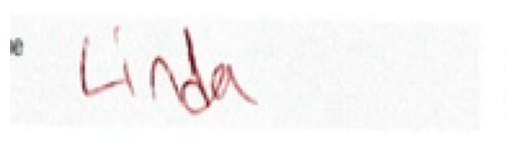

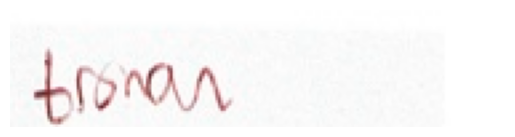

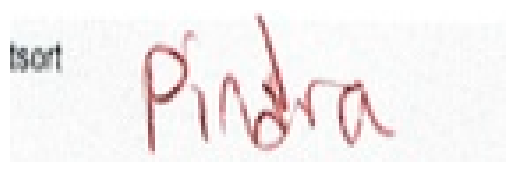

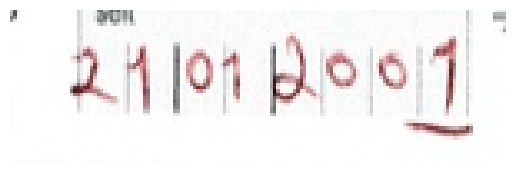

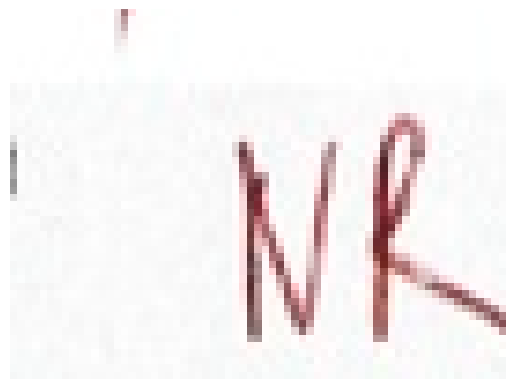

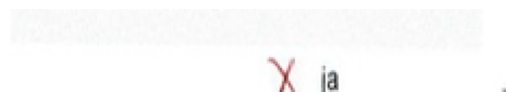

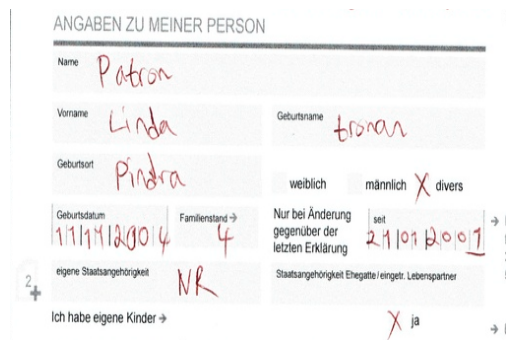

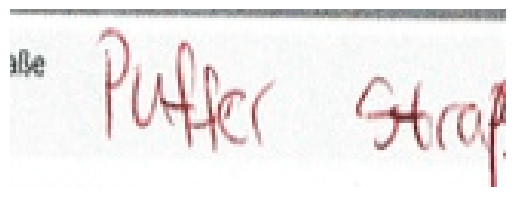

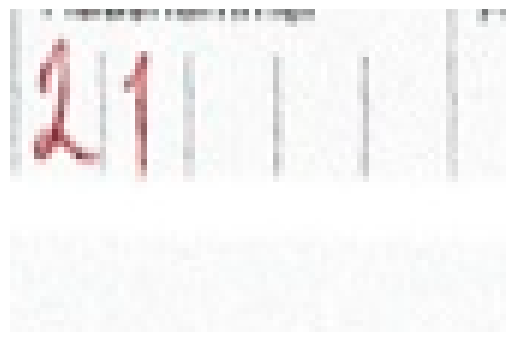

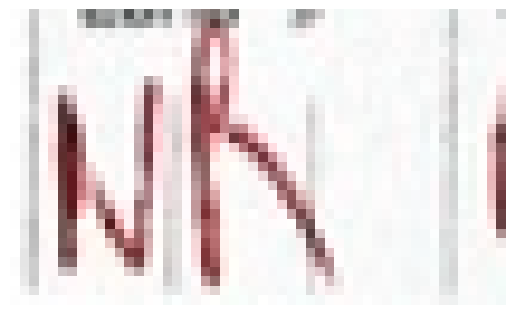

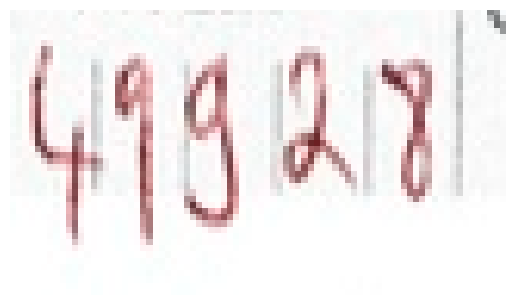

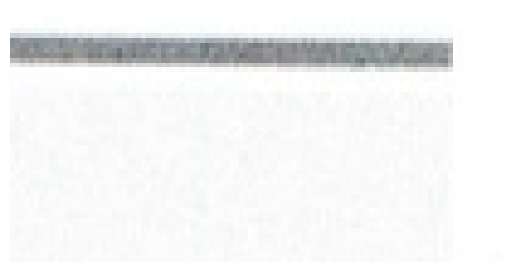

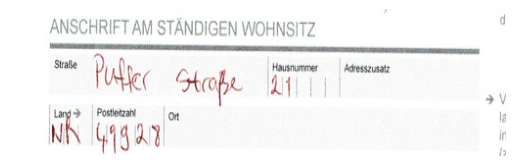

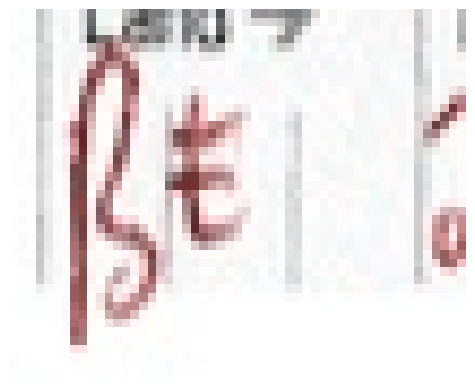

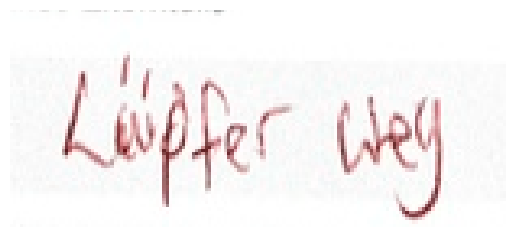

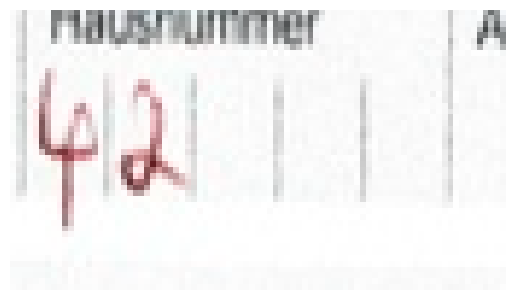

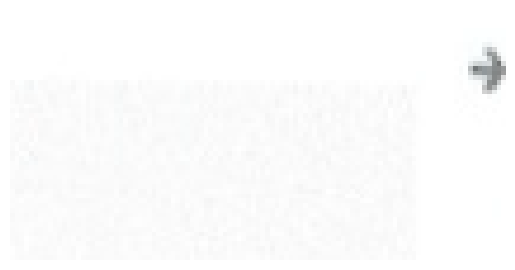

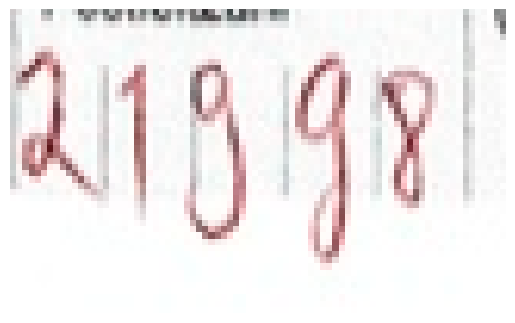

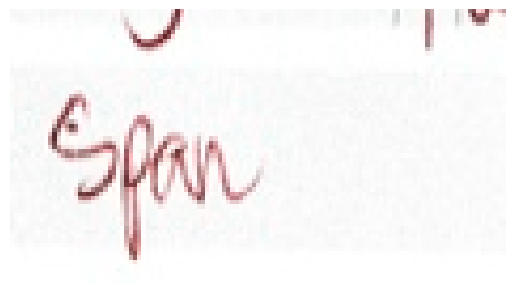

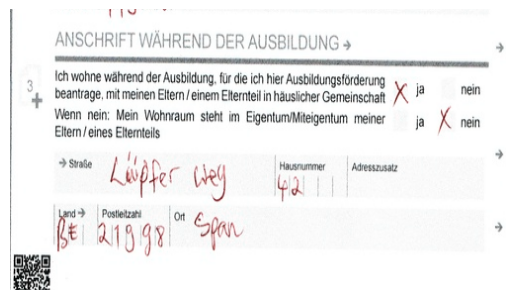

In [6]:
# Crop ROI
import cv2
from bounding_box.ressize import resize_imaged_without_expand_dim
from bounding_box.config import YOLO_WIDTH, YOLO_HEIGHT
def crop(xmin, ymin, xmax, ymax, image_path):
    image = cv2.imread(image_path)
    image = resize_imaged_without_expand_dim(image, YOLO_WIDTH, YOLO_HEIGHT)
    xmin = int(round(xmin))
    ymin = int(round(ymin))
    xmax = int(round(xmax))
    ymax = int(round(ymax))
    # width = int(round(width))
    # height = int(round(height))
    # rowBeg = y
    # rowEnd = y + height
    # columnBeg = x
    # columnEnd = x + width
    imgCropped = image[ymin:ymax, xmin:xmax]
    return imgCropped

import matplotlib.pyplot as plt
images_cropped = []
for b in sub_boxes:
    xmin, ymin, xmax, ymax = b
    imgCropped = crop(xmin, ymin, xmax, ymax, image_path)
    images_cropped.append(imgCropped)
    plt.axis("off")
    plt.imshow(imgCropped)
    plt.show()


## Handwriting Recognition

### Preprocess Image

In [7]:
import numpy as np
import utils.configs as cfg
config_path = "utils/configs.json"
config = cfg.Config(config_path)
IMAGE_WIDTH = config.get_model_parameter()["width"] # default: 1024
IMAGE_HEIGHT = config.get_model_parameter()["height"] # default: 128

img_size=(IMAGE_WIDTH, IMAGE_HEIGHT)
images = []
for image in images_cropped:
    image = np.mean(image, axis=2, keepdims=True)
    image = preprocess.distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    images.append(image)

### Plot Images

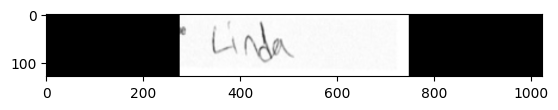

In [8]:
plot_image = images[9]
plot_image = np.transpose(plot_image, (1, 0, 2))
plot_image = np.flipud(plot_image)
plt.imshow(plot_image[:, :, 0],cmap='gray')

# Show the plot
plt.show()

### Handwriting Recognition Neural Network

In [9]:
from keras.models import load_model
import os
import handwriting.tokenizer as tokenizer
import pickle
# Load from pickle file
with open('handwriting_model_characters.pkl', 'rb') as file:
    loaded_max_len, loaded_characters = pickle.load(file)

# Print loaded data
print("Loaded max_len:", loaded_max_len)
print("Loaded characters:", loaded_characters)

0_0
0_1
0_10
0_11
0_12
0_13
0_14
0_15
0_16
0_17
0_18
0_19
0_2
0_20
0_21
0_3
0_4
0_5
0_6
0_7
0_8
0_9
10_0
10_1
10_10
10_11
10_12
10_13
10_14
10_15
10_16
10_17
10_18
10_19
10_2
10_20
10_21
10_3
10_4
10_5
10_6
10_7
10_8
10_9
11_0
11_1
11_10
11_11
11_12
11_13
11_14
11_15
11_16
11_17
11_18
11_19
11_2
11_20
11_21
11_3
11_4
11_5
11_6
11_7
11_8
11_9
12_0
12_1
12_10
12_11
12_12
12_13
12_14
12_15
12_16
12_17
12_18
12_19
12_2
12_20
12_21
12_3
12_4
12_5
12_6
12_7
12_8
12_9
13_0
13_1
13_10
13_11
13_12
13_13
13_14
13_15
13_16
13_17
13_18
13_19
13_2
13_20
13_21
13_3
13_4
13_5
13_6
13_7
13_8
13_9
14_0
14_1
14_10
14_11
14_12
14_13
14_14
14_15
14_16
14_17
14_18
14_19
14_2
14_20
14_21
14_3
14_4
14_5
14_6
14_7
14_8
14_9
15_0
15_1
15_10
15_11
15_12
15_13
15_14
15_15
15_16
15_17
15_18
15_19
15_2
15_20
15_21
15_3
15_4
15_5
15_6
15_7
15_8
15_9
16_0
16_1
16_10
16_11
16_12
16_13
16_14
16_15
16_16
16_17
16_18
16_19
16_2
16_20
16_21
16_3
16_4
16_5
16_6
16_7
16_8
16_9
17_0
17_1
17_10
17_11
17_12
17_13
17_14
17_15


In [16]:
from keras.layers import StringLookup
char_to_num = StringLookup(vocabulary=list(loaded_characters), mask_token=None)
num_to_char = StringLookup(vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True)

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:, :loaded_max_len]
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


def load_model_and_weights():
    model_weight_path = "models/model9v3_xl/model9v3_xl_weights.keras"
    model_path = "models/model9v3_xl"
    print(model_path)
    if os.path.exists(model_path):
        print("Loading pre-trained model and weights...")
        model = load_model(model_path)
        model.load_weights(model_weight_path)
        print("Model and weights loaded successfully.")

        return model
    else:
        print("No pre-trained model or weights found.")
        return None

In [17]:
# Neural Network Handwriting
handwriting_model = load_model_and_weights()
prediction_model = keras.models.Model(handwriting_model.get_layer(name="image").input, handwriting_model.get_layer(name="dense2").output)

models/model9v3_xl
Loading pre-trained model and weights...
Model and weights loaded successfully.
1/1 [==============================] - 0s 60ms/step


In [ ]:
predicted_texts = []
# Prediction
for image in images:
    preds = prediction_model.predict(tf.expand_dims(image, axis=0))
    pred_texts = decode_batch_predictions(preds)
    selected_pred_text = pred_texts[0]
    selected_pred_text = selected_pred_text.replace("|"," ")
    predicted_texts.append(selected_pred_text)

### Predicted Texts

In [19]:
print(predicted_texts)

['worstpale Hochodule.', '"tits.', 'mote .', 'girgzrpanasamibed .', ' lohhabebereis henereneneataa-anassesiven o toa nem', 'sizin .', 'Tiititiesoy', 'f', 'Pution', 'uinda', 'toron.', 'a pndra.', ' silrpoeL .', 've', 'i. .', 'iziisis .', 'a foffor sint .', 'it. ...', "wh '", 'yiigesl .', '', 'Frgiiiiiior .', 'ifof i', 'cispfer mny', 'ffidi " . "', " '", "arrgys '", 'Gin "', 'iiiiiizi']


### Spell Checker

In [20]:
from spellchecker import SpellChecker

# spell = SpellChecker()

# Initialisierung des Spellcheckers für Deutsch
spell = SpellChecker(language='de')

# Hinzufügen von benutzerdefinierten Wörtern
# custom_words = ['Colin', 'asddf']
# spell.word_frequency.load_words(custom_words)

# Verwendung einer Datei von häufigen Wörtern oder Fachbegriffen
# with open('/data/custom_dictionary.txt') as f:
#     custom_words = f.read().splitlines()
# spell.word_frequency.load_words(custom_words)

output_text = []
for text in predicted_texts:
    words = [word for word in text.split(" ") if word != '']
    #Spellchecker
    corrected_text = ' '.join([spell.correction(word) if spell.correction(word) is not None else word for word in text.split()])
    output_text.append(corrected_text)
print(output_text)

['worstpale Hochodule.', '"tits.', 'rote .', 'girgzrpanasamibed .', 'lohhabebereis henereneneataa-anassesiven o tot nem', 'sein .', 'Tiititiesoy', 'f', 'putzen', 'linda', 'tyrone', 'a pndra.', 'silrpoeL .', 'je', 'in .', 'iziisis .', 'a foffor sind .', 'it ...', "wo '", 'yiigesl .', '', 'Frgiiiiiior .', 'of i', 'cispfer my', 'widi " . "', "'", "arrgys '", 'Gin "', 'iiiiiizi']


# Plot Predicted Text and Image

In [21]:
def plot_evaluation(images, texts): 
    for i in range(16):
        pred_texts = texts[i]
        title = f"Prediction: {pred_texts}"
        plot_image = images[i]
        plot_image = np.transpose(plot_image, (1, 0, 2))
        plot_image = np.flipud(plot_image)
        plt.title(title)
        plt.imshow(plot_image[:, :, 0],cmap='gray')
        plt.show()
    


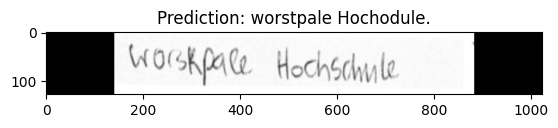

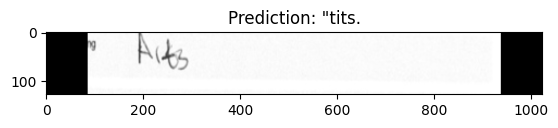

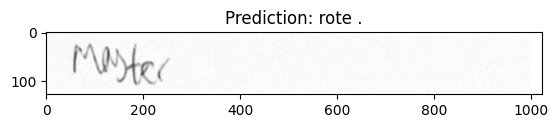

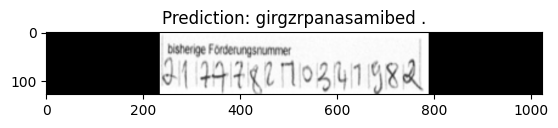

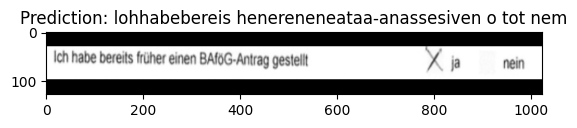

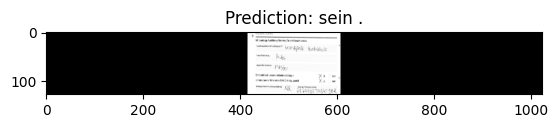

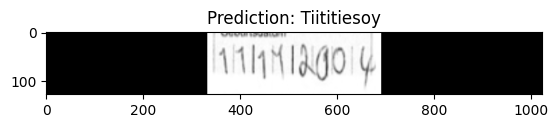

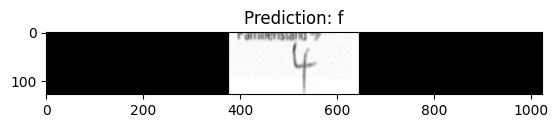

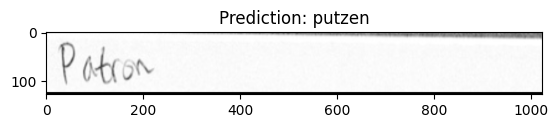

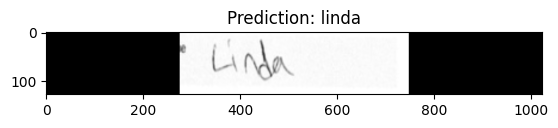

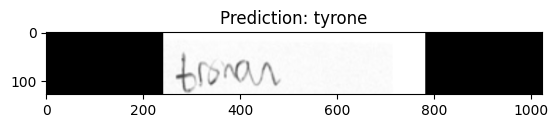

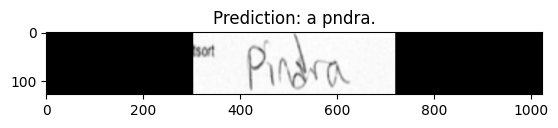

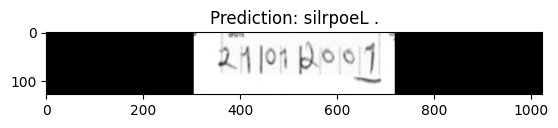

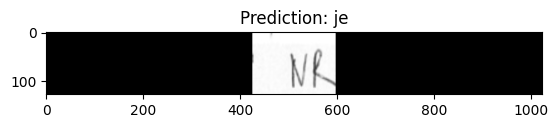

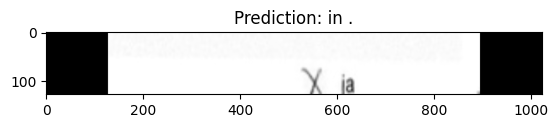

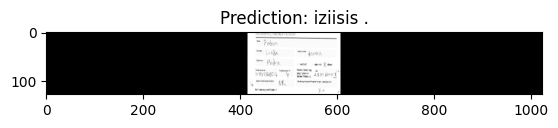

In [22]:
plot_evaluation(images, output_text)